In [2]:
#importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#importing data
df = pd.read_csv("cleanedData.csv")
df.set_index('ID', inplace=True)

df.head(5)

,price,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,hasGarage,pool,spa
ID,,,,,,,,,,
1,169900,1985,2302,3,4,0,0,0,0,0
2,159000,1910,2864,2,4,0,0,0,0,0
3,45000,1945,728,1,1,1,0,0,0,0
4,165000,1971,1620,2,2,0,0,0,0,0
5,173500,1980,1512,2,3,0,0,0,0,0


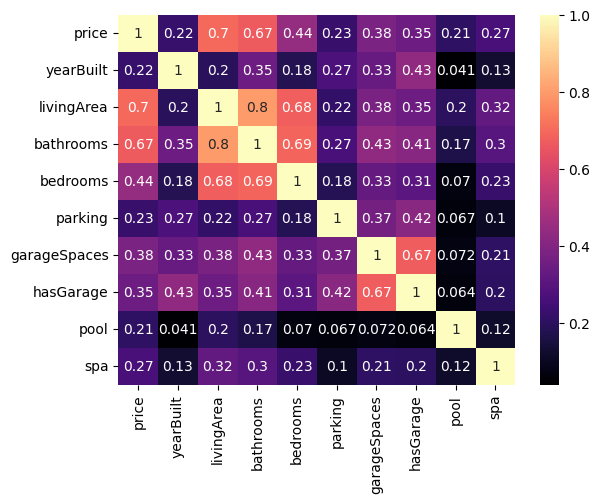

In [4]:
#heatmap
sb.heatmap(df.corr(), annot=True, cmap='magma')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
#scatterplot
#price & year built
prices = [i for i in df['price']]
yearBuiltList = [i for i in df['yearBuilt']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs year built")
plt.ylabel("Price(USD)")
plt.xlabel("Year built")
plt.show()

#price & size
yearBuiltList = [i for i in df['livingArea']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs square feet")
plt.ylabel("Price(USD)")
plt.xlabel("Square feet")
plt.show()

#price & bathrooms
yearBuiltList = [i for i in df['bathrooms']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs bathrooms")
plt.ylabel("Price(USD)")
plt.xlabel("# of bathrooms")
plt.show()

#price & bedrooms
yearBuiltList = [i for i in df['bedrooms']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs bedrooms")
plt.ylabel("Price(USD)")
plt.xlabel("# of bedrooms")
plt.show()

#price & parking
yearBuiltList = [i for i in df['parking']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs if has parking")
plt.ylabel("Price(USD)")
plt.xlabel("Parking or no")
plt.show()

#price & garageSpaces
yearBuiltList = [i for i in df['garageSpaces']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs parking spaces")
plt.ylabel("Price(USD)")
plt.xlabel("# of spaces")
plt.show()

#price & hasGarage
yearBuiltList = [i for i in df['hasGarage']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs has garage")
plt.ylabel("Price(USD)")
plt.xlabel("Garage or no")
plt.show()

#price & pool
yearBuiltList = [i for i in df['pool']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs pool")
plt.ylabel("Price(USD)")
plt.xlabel("Pool or no")
plt.show()

#price & spa
yearBuiltList = [i for i in df['spa']]
plt.scatter(yearBuiltList, prices)
plt.ticklabel_format(style='plain')
plt.title("Price vs spa")
plt.ylabel("Price(USD)")